# Problem Statement

## Problem 1: Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [76]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import os

## Importing Data

In [77]:
# reading the CSV file into pandas dataframe
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\PM Project')
df=pd.read_csv("cubic_zirconia.csv")

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

## EDA

In [78]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [79]:
# drop the serial column as it is useless for the model
df.drop("Unnamed: 0", axis=1, inplace=True)

In [80]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [82]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [83]:
df.shape

(26967, 10)

## unique values for categorical variables

In [84]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




## Check for Null Values

In [85]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

## Univariate Analysis

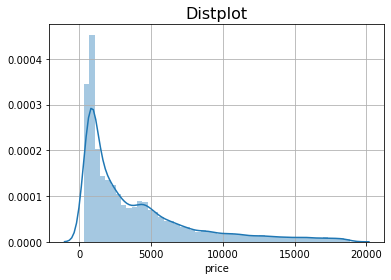

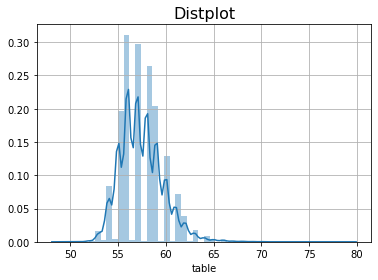

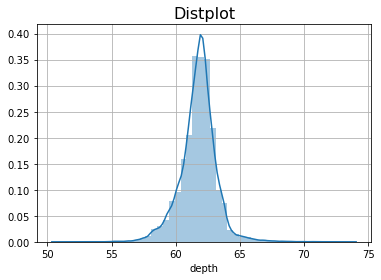

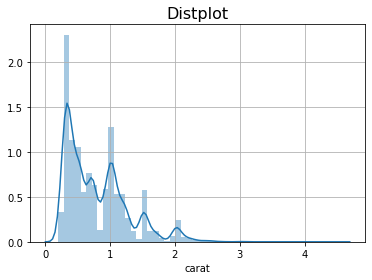

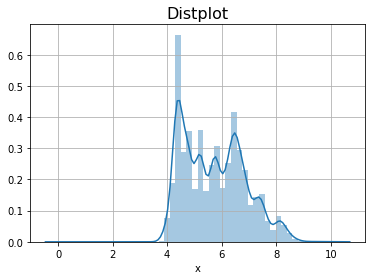

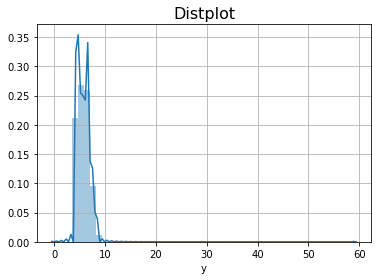

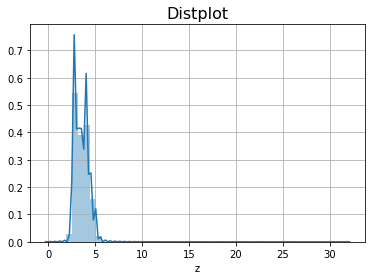

In [86]:
cols = ['price','table','depth','carat','x','y','z']
for i in cols:
    sns.distplot(df[i])
    plt.grid()
    plt.title('Distplot',fontsize=16)
    plt.show();

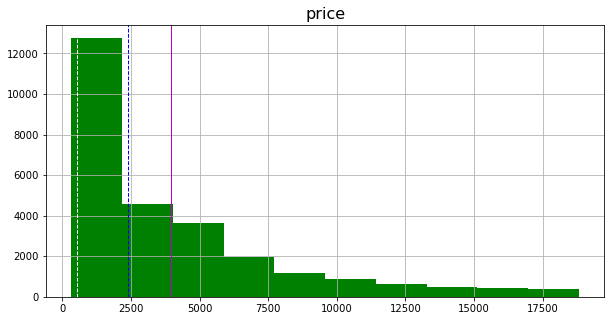

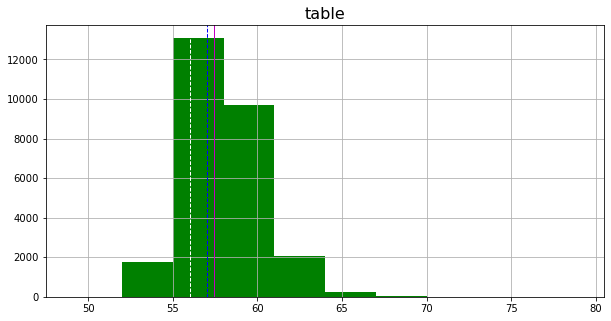

C:\Users\Vikas\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Vikas\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


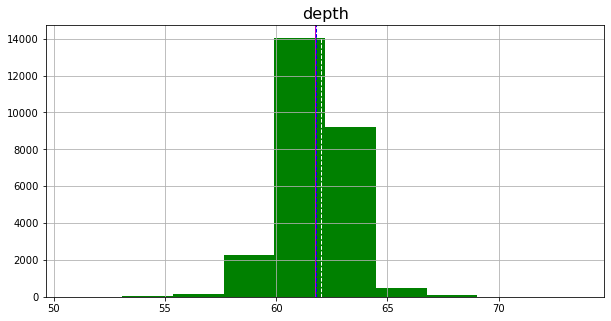

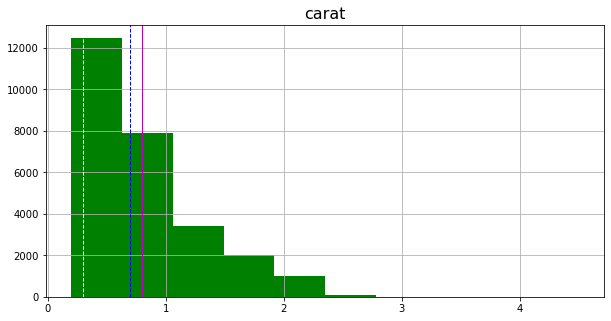

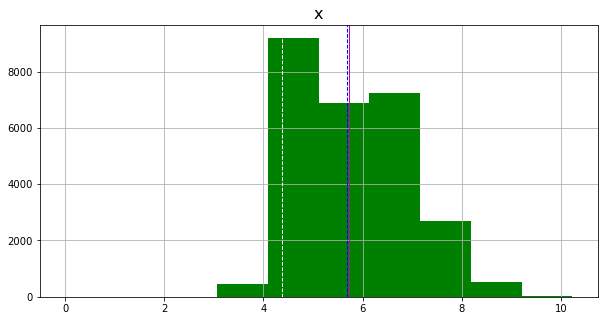

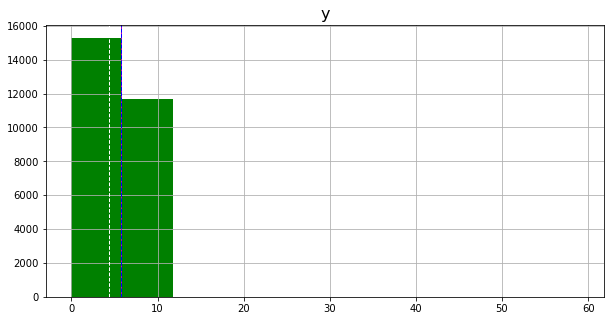

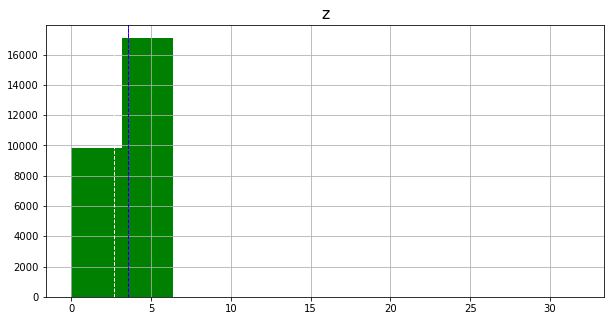

In [87]:
cols = ['price','table','depth','carat','x','y','z']
for i in cols:
    plt.figure(figsize=(10,5)) # makes the plot wider
    plt.hist(df[i], color='g') # plots a simple histogram
    plt.axvline(df[i].mean(), color='m', linewidth=1)
    plt.axvline(df[i].median(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(df[i].mode()[0], color='w', linestyle='dashed', linewidth=1)
    plt.grid()
    plt.title(i,fontsize=16)
    plt.show();

## Bivariate Analysis

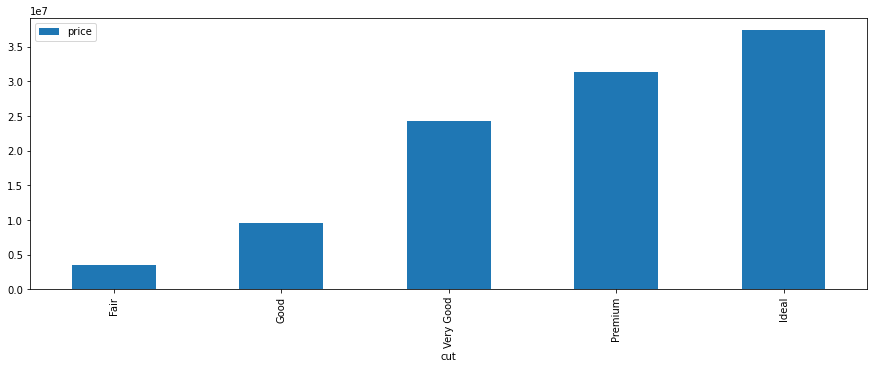

In [88]:
#This is an example of Numerical vs Categorical.
#Bar Plot to check price by cut
df.groupby(by=['cut'])['price'].sum().reset_index().sort_values(['price']).plot(x='cut',
                                                                                                           y='price',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

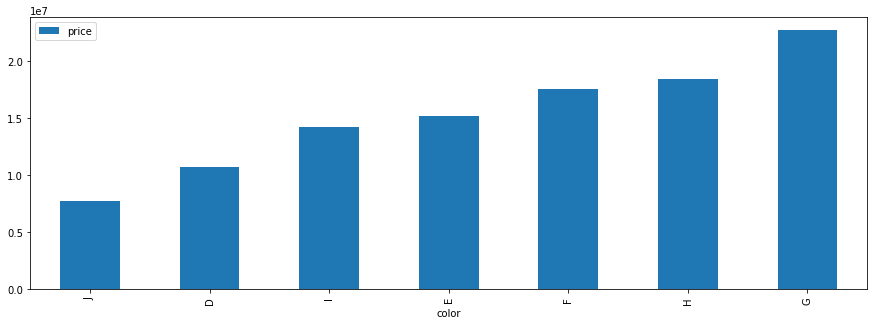

In [89]:
#This is an example of Numerical vs Categorical.
#Bar Plot to check price by cut
df.groupby(by=['color'])['price'].sum().reset_index().sort_values(['price']).plot(x='color',
                                                                                                           y='price',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

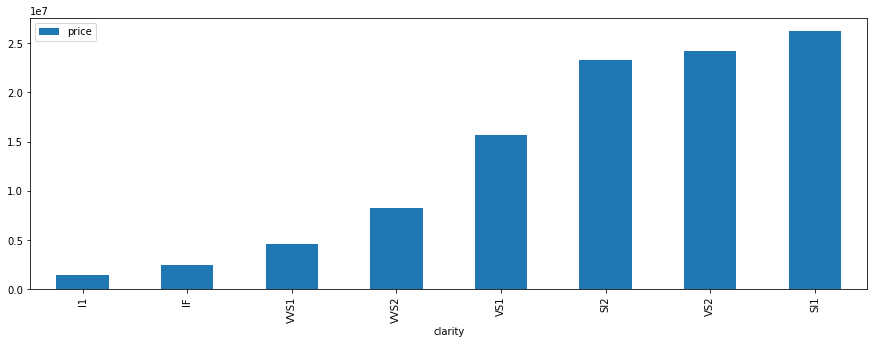

In [90]:
#This is an example of Numerical vs Categorical.
#Bar Plot to check price by cut
df.groupby(by=['clarity'])['price'].sum().reset_index().sort_values(['price']).plot(x='clarity',
                                                                                                           y='price',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

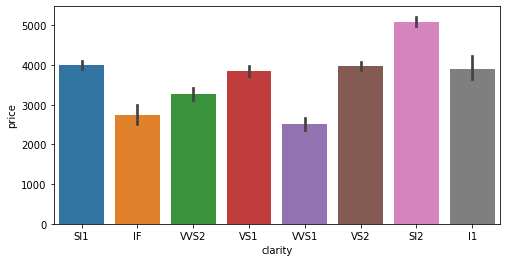

In [91]:
#Bar Plot for Price vs clarity
plt.figure(figsize=(8,4))
ax = sns.barplot(x="clarity", y="price", data=df)

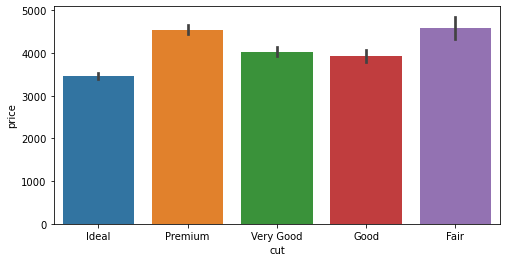

In [92]:
#Bar Plot for Price vs cut
plt.figure(figsize=(8,4))
ax = sns.barplot(x="cut", y="price", data=df)

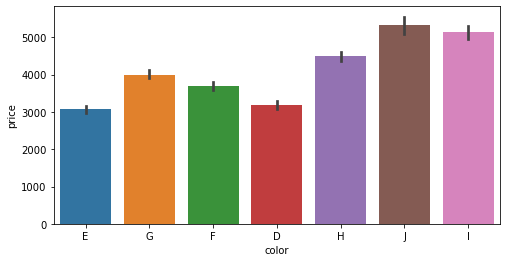

In [93]:
#Bar Plot for Price vs color
plt.figure(figsize=(8,4))
ax = sns.barplot(x="color", y="price", data=df)

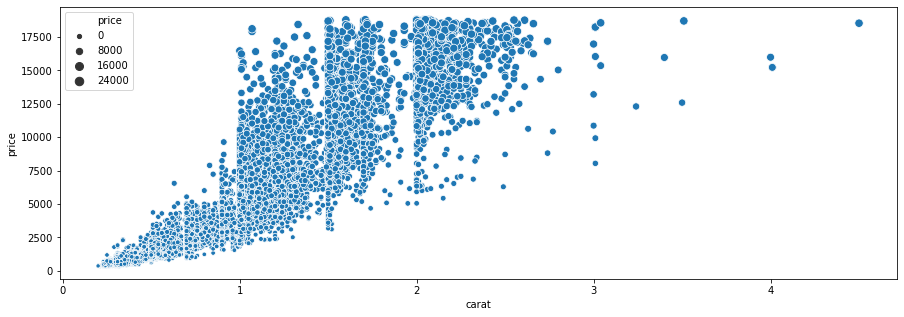

In [94]:
#scatter plot price vs carat
#numerical vs numerical
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['carat'],y='price', data=df, size = "price") # scatter plot

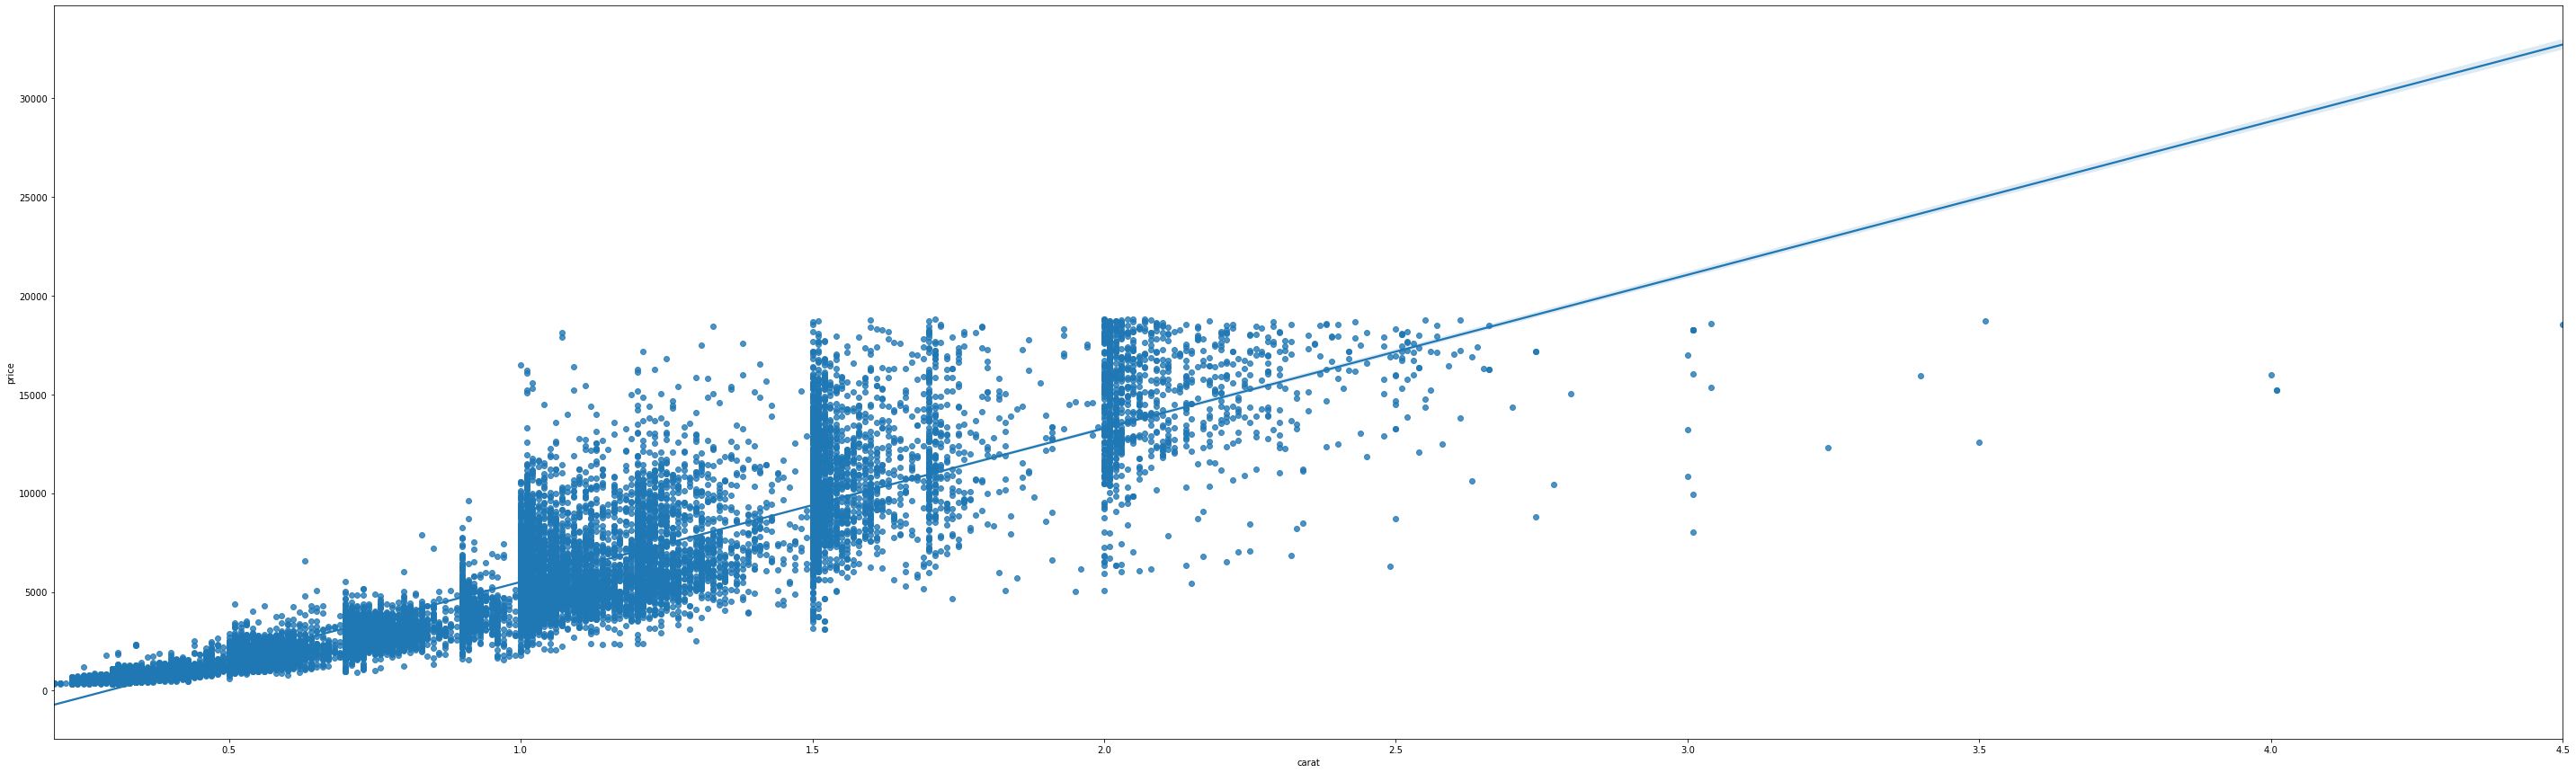

In [95]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='carat',y='price', data=df ) # regression plot - scatter plot with a regression line

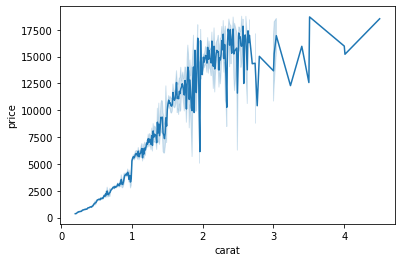

In [96]:
#Here we plotting a line plot. This code might take some time to execute. 
sns.lineplot(x='carat',y='price', data=df)

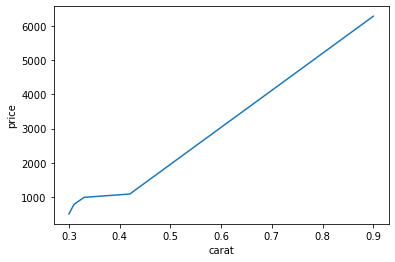

In [97]:
#Here we plotting a line plot. This code might take some time to execute. 
sns.lineplot(x='carat',y='price', data=df.head() )

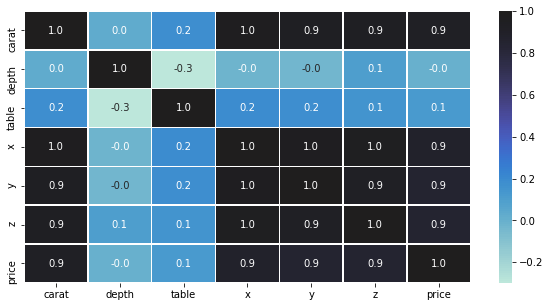

In [98]:
#Correlation among pairs of continuous variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

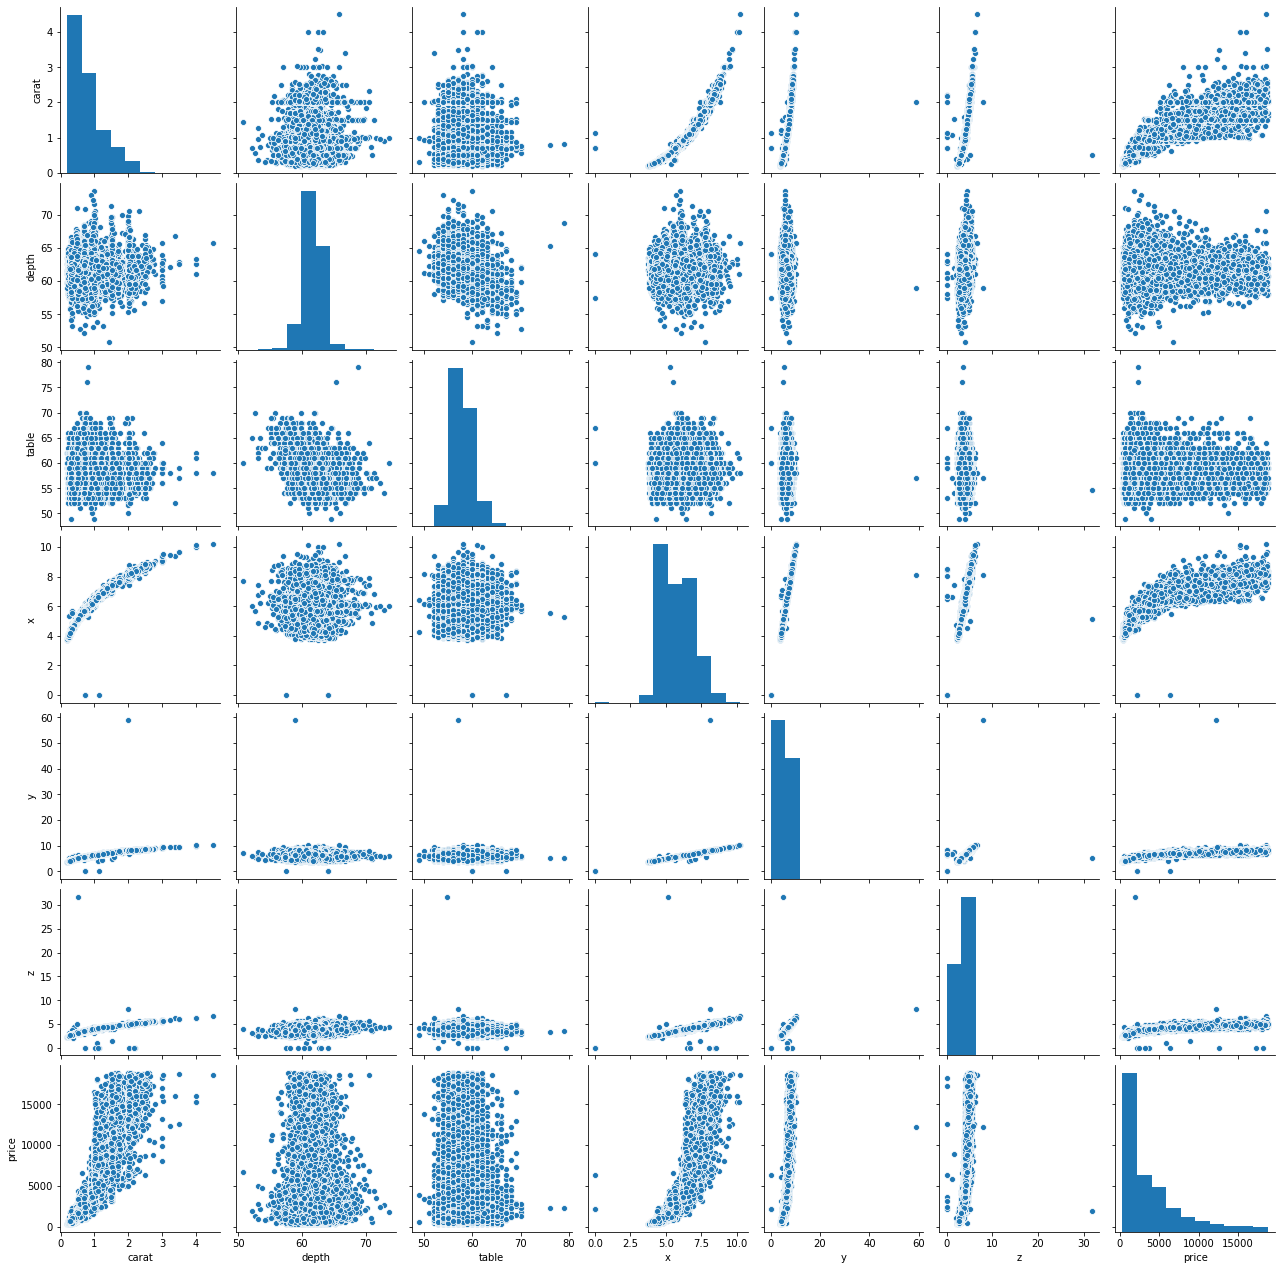

In [99]:
#Checking pairwise distribution of the continuous variables
sns.pairplot(df)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

## Imputing missing values

In [100]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Preprocessing for removal of erroneous datapoints

In [101]:
df[(df['carat']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [102]:
df[(df['depth']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [103]:
df[(df['table']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [104]:
df[(df['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [105]:
df[(df['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [106]:
df[(df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [107]:
df[(df['price']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


### As can be seen, 9 rows have at least one of the values of x, y or z as 0. However, since the length, width or height of cubic zirconia cannot be zero, the same are erroneous datapoints and hence need to be dropped.

In [108]:
df.drop(df.index[[5821,6034,6215,10827,12498,12689,17506,18194,23758]],inplace=True)

In [109]:
df.shape

(26958, 10)

## Checking for duplicates

In [110]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 33


In [111]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26958, 10)
After (26925, 10)


In [112]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Considering that there is significant variation among the UOM of all seven numerical variables, scaling needs to be done to avoid excessive weightage being assigned to any of the variables during regression.
Carat - Weight,
Depth - Ratio, 
Table - %,
x - mm,
y - mm,
z - mm,
Price -currency.

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.

## Checking for Outliers 

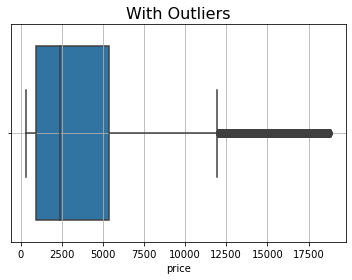

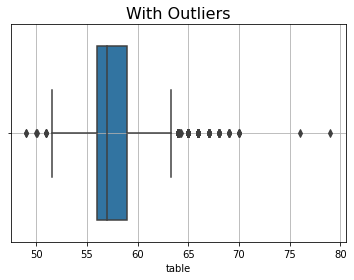

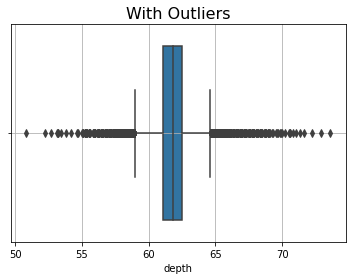

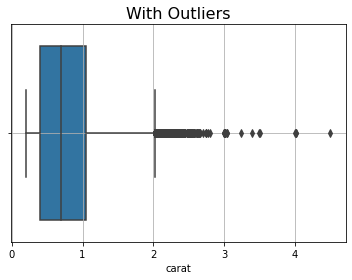

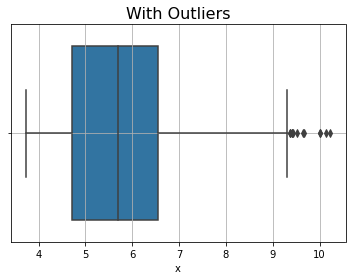

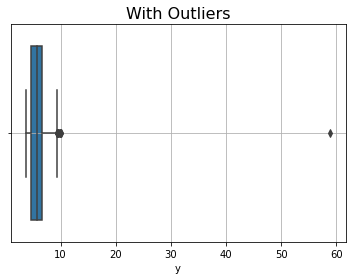

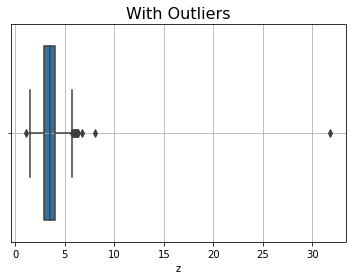

In [113]:
cols = ['price','table','depth','carat','x','y','z']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('With Outliers',fontsize=16)
    plt.show();

In [114]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [115]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

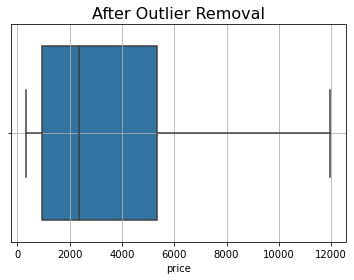

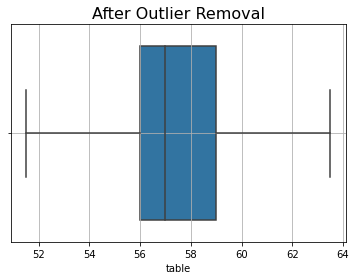

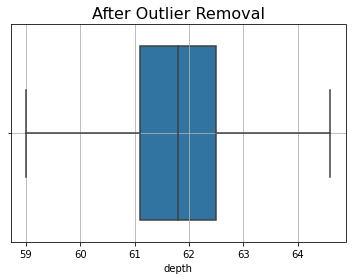

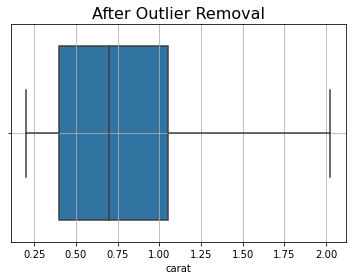

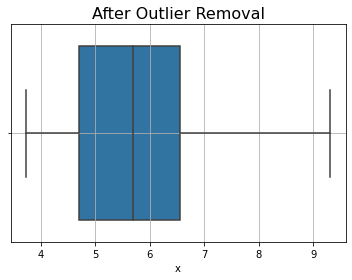

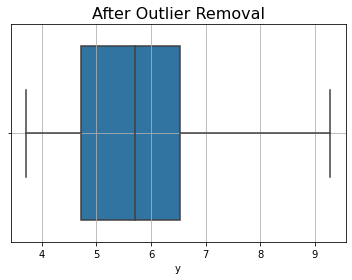

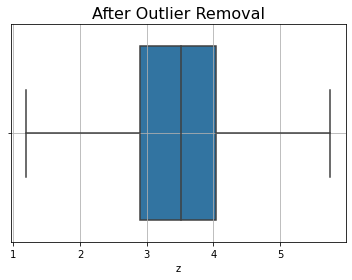

In [116]:
cols = ['price','table','depth','carat','x','y','z']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('After Outlier Removal',fontsize=16)
    plt.show();

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

## Converting categorical to dummy variables

In [117]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. 
df = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'], drop_first = True)

In [118]:
df.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [119]:
df.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,...,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.793119,61.749236,57.435023,5.729217,5.731159,3.537625,3734.453965,0.090399,0.401300,0.255525,...,0.151941,0.102693,0.053482,0.033092,0.243788,0.169396,0.151755,0.226258,0.068301,0.093965
std,0.461998,1.218216,2.156704,1.125500,1.117494,0.695681,3466.394724,0.286758,0.490171,0.436164,...,0.358970,0.303563,0.224997,0.178880,0.429374,0.375109,0.358790,0.418416,0.252266,0.291785
min,0.200000,59.000000,51.500000,3.730000,3.710000,1.190000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.025000,64.600000,63.500000,9.310000,9.285000,5.750000,11965.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Scaling of Numerical Variables except Target Variable

In [121]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [122]:
#scaling all the numerical variables except the target variable
df[['carat','depth','table','x','y','z']] = std_scale.fit_transform(df[['carat','depth','table','x','y','z']]) # returns z-scores of the values of the attribute

In [123]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067382,0.287938,0.261968,-1.296530,-1.289659,-1.261558,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.002446,-0.779216,0.261968,-1.163253,-1.137530,-1.204060,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.231349,0.370027,1.189326,0.276134,0.347964,0.348406,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.807636,-0.122506,-0.665390,-0.807849,-0.833272,-0.830318,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.045737,-1.107571,0.725647,-1.225449,-1.164377,-1.275933,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Train-Test Split

In [124]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [125]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [126]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067382,0.287938,0.261968,-1.296530,-1.289659,-1.261558,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.002446,-0.779216,0.261968,-1.163253,-1.137530,-1.204060,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.231349,0.370027,1.189326,0.276134,0.347964,0.348406,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.807636,-0.122506,-0.665390,-0.807849,-0.833272,-0.830318,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.045737,-1.107571,0.725647,-1.225449,-1.164377,-1.275933,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression Model

In [127]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [128]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 4250.457434775835
The coefficient for depth is 15.089147908976532
The coefficient for table is -49.78513156628994
The coefficient for x is -1325.1245288222378
The coefficient for y is 1209.4771891355595
The coefficient for z is -445.5442340016475
The coefficient for cut_Good is 387.2988842003968
The coefficient for cut_Ideal is 629.8857307010381
The coefficient for cut_Premium is 598.6724205774459
The coefficient for cut_Very Good is 502.3926458326055
The coefficient for color_E is -188.875757670998
The coefficient for color_F is -231.2333583693566
The coefficient for color_G is -411.08184538868977
The coefficient for color_H is -831.51759105386
The coefficient for color_I is -1330.118385194429
The coefficient for color_J is -1861.6106054885465
The coefficient for clarity_IF is 3995.2161856149214
The coefficient for clarity_SI1 is 2535.9075142485135
The coefficient for clarity_SI2 is 1712.1730066992054
The coefficient for clarity_VS1 is 3355.118618916721
Th

In [129]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 847.8856961342194


In [130]:
# R square on training data
regression_model.score(X_train, y_train)

0.9404719023794608

#### 94% of the variation in the price is explained by the predictors in the model for train set

In [131]:
# R square on testing data
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9416169655432696

In [132]:
import math
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

MSE = np.mean((regression_model.predict(X_test)-y_test)**2)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

842.0881486788842


In [133]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [134]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

# concatenate X and y into a single dataframe

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,0.664259,1.273004,-0.665390,0.711505,0.759608,0.880269,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
12108,0.469450,1.847625,-0.665390,0.507147,0.580632,0.750897,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5166.0
20181,-0.266498,-0.861305,1.838477,-0.114810,-0.081576,-0.183457,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1708.0
4712,-0.071688,-2.256814,2.580364,0.285019,0.213733,-0.097209,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2447.0
2548,0.469450,0.862560,0.725647,0.569343,0.544837,0.650274,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618.0


In [135]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11971,1.551726,1.026737,0.725647,1.360117,1.412867,1.512755,0,0,0,1,...,1,0,0,1,0,0,0,0,0,8758.0
3294,0.491095,-0.779216,0.261968,0.684849,0.652222,0.578401,0,0,1,0,...,0,0,0,1,0,0,0,0,0,4718.0
25427,2.666470,-1.435926,0.261968,2.293054,2.236154,2.044618,0,0,1,0,...,0,0,0,0,1,0,0,0,0,11965.0
709,1.984636,0.123761,1.653006,1.671096,1.735023,1.714001,0,0,0,1,...,0,0,0,0,0,1,0,0,0,11965.0
8010,1.530080,1.765537,0.725647,1.351232,1.296533,1.541505,1,0,0,0,...,0,0,0,0,0,0,1,0,0,8165.0


In [136]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

In [137]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [138]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [139]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept         847.885696
carat            4250.457435
depth              15.089148
table             -49.785132
x               -1325.124529
y                1209.477189
z                -445.544234
cut_Good          387.298884
cut_Ideal         629.885731
cut_Premium       598.672421
cut_Very_Good     502.392646
color_E          -188.875758
color_F          -231.233358
color_G          -411.081845
color_H          -831.517591
color_I         -1330.118385
color_J         -1861.610605
clarity_IF       3995.216186
clarity_SI1      2535.907514
clarity_SI2      1712.173007
clarity_VS1      3355.118619
clarity_VS2      3072.161694
clarity_VVS1     3776.896146
clarity_VVS2     3766.786987
dtype: float64

In [140]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:20:40   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18823   BIC:                         3.077e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       847.8857     65.408     12.963

### The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [141]:
# Calculate MSE
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [142]:
#Root Mean Squared Error - RMSE
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

842.0881486788842

In [143]:
# so there is avg of 842 (roundoff) price difference from real price on an avg

In [144]:
np.sqrt(lm1.mse_resid) #another way

844.293346287547

In [145]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

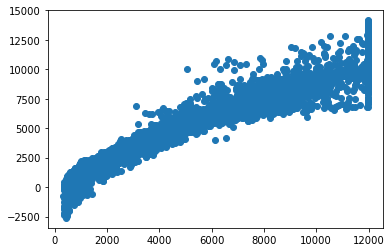

In [146]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [148]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(847.89) * Intercept + (4250.46) * carat + (15.09) * depth + (-49.79) * table + (-1325.12) * x + (1209.48) * y + (-445.54) * z + (387.3) * cut_Good + (629.89) * cut_Ideal + (598.67) * cut_Premium + (502.39) * cut_Very_Good + (-188.88) * color_E + (-231.23) * color_F + (-411.08) * color_G + (-831.52) * color_H + (-1330.12) * color_I + (-1861.61) * color_J + (3995.22) * clarity_IF + (2535.91) * clarity_SI1 + (1712.17) * clarity_SI2 + (3355.12) * clarity_VS1 + (3072.16) * clarity_VS2 + (3776.9) * clarity_VVS1 + (3766.79) * clarity_VVS2 + 

## Conclusion

### The final Linear Regression equation is

#### price = (847.89) * Intercept + (4250.46) * carat + (15.09) * depth + (-49.79) * table + (-1325.12) * x + (1209.48) * y + (-445.54) * z + (387.3) * cut_Good + (629.89) * cut_Ideal + (598.67) * cut_Premium + (502.39) * cut_Very_Good + (-188.88) * color_E + (-231.23) * color_F + (-411.08) * color_G + (-831.52) * color_H + (-1330.12) * color_I + (-1861.61) * color_J + (3995.22) * clarity_IF + (2535.91) * clarity_SI1 + (1712.17) * clarity_SI2 + (3355.12) * clarity_VS1 + (3072.16) * clarity_VS2 + (3776.9) * clarity_VVS1 + (3766.79) * clarity_VVS2 

#### When carat increases by 1 unit, price increases by 4250 units, keeping all other predictors constant. Similarly, when depth increases by 1 unit, price increases by 15 units, keeping all other predictors constant.

#### There are also some negative co-efficient values, for instance, table has its corresponding co-efficient as -49.79. This implies, when the table increases by 1 unit, the price decreases by 50 units, keeping all other predictors constant.

## Problem 2: Logistic Regression & Linear Discriminant Analysis

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import os
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

## Importing Data

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [2]:
# reading the CSV file into pandas dataframe
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\PM Project')
mydata=pd.read_csv("Holiday_Package.csv")

## EDA

In [3]:
# Check top few records to get a feel of the data structure
mydata.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
# drop the serial column as it is useless for the model
mydata.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
mydata.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
mydata.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [8]:
mydata.shape

(872, 7)

## unique values for categorical variables

In [9]:
for column in mydata.columns:
    if mydata[column].dtype == 'object':
        print(column.upper(),': ',mydata[column].nunique())
        print(mydata[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




## Check for Null Values

In [10]:
# Are there any missing values ?
mydata.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### There are no null values in the dataset

## Univariate Analysis

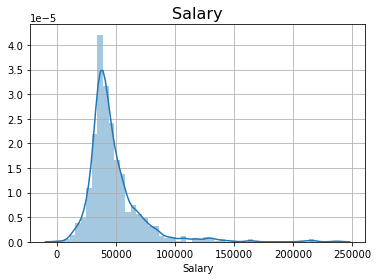

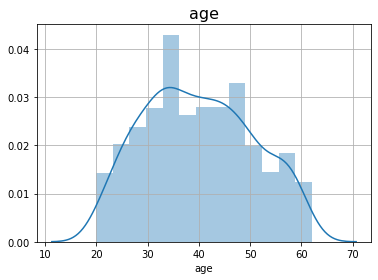

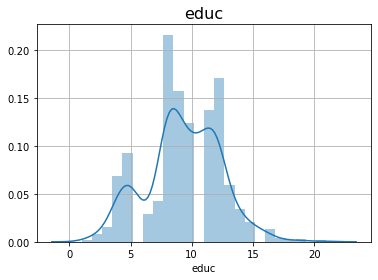

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


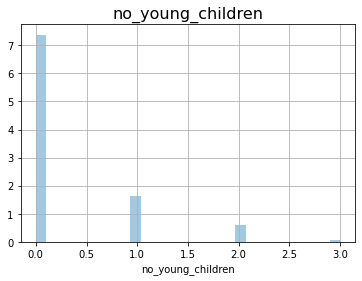

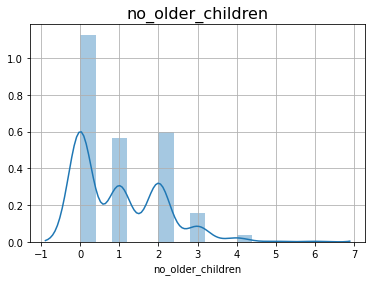

In [11]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.distplot(mydata[i])
    plt.grid()
    plt.title(i,fontsize=16)
    plt.show();

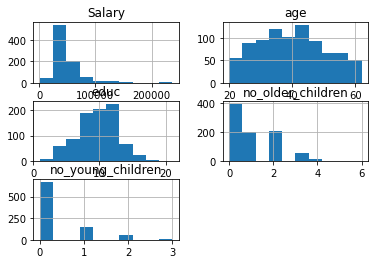

In [12]:
mydata[['Salary','age','educ','no_young_children','no_older_children']].hist();

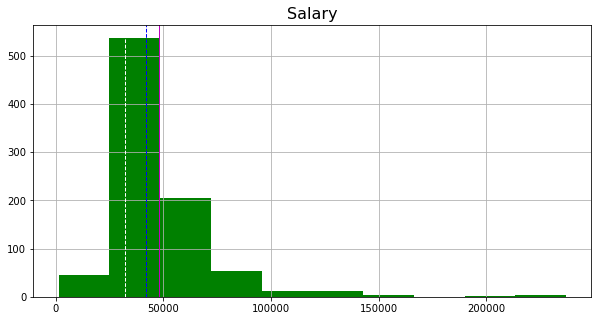

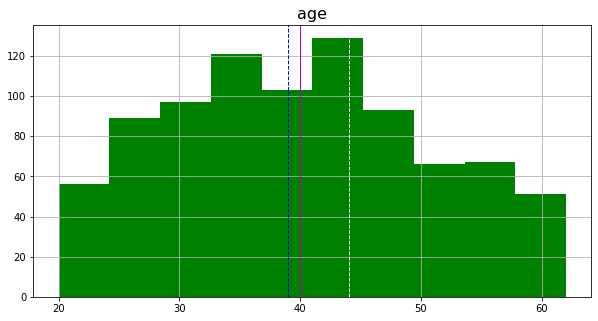

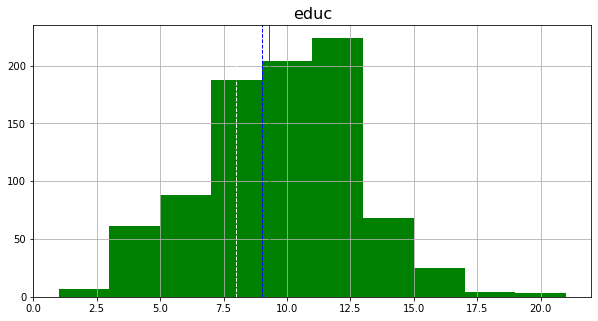

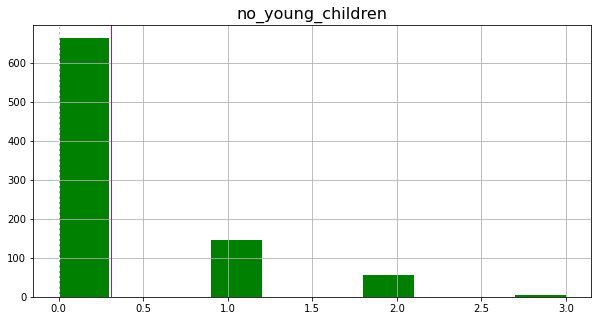

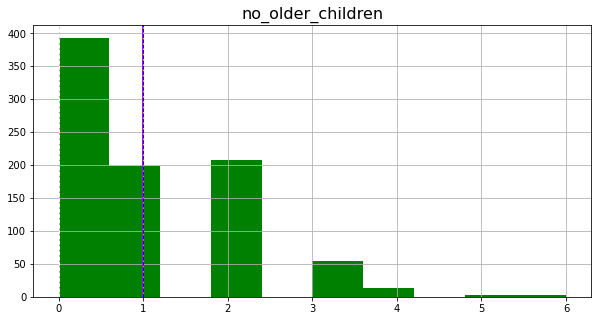

In [13]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    plt.figure(figsize=(10,5)) # makes the plot wider
    plt.hist(mydata[i], color='g') # plots a simple histogram
    plt.axvline(mydata[i].mean(), color='m', linewidth=1)
    plt.axvline(mydata[i].median(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(mydata[i].mode()[0], color='w', linestyle='dashed', linewidth=1)
    plt.grid()
    plt.title(i,fontsize=16)
    plt.show();

## Bi-Variate Analysis with Target variable¶

###  Salary and Holiday Package

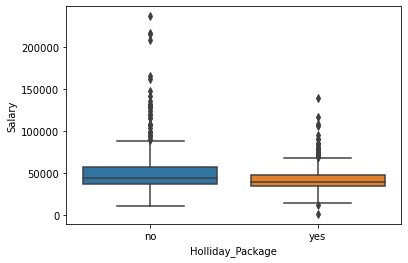

In [14]:
sns.boxplot(mydata['Holliday_Package'],mydata['Salary'])

###  Age and Holiday Package

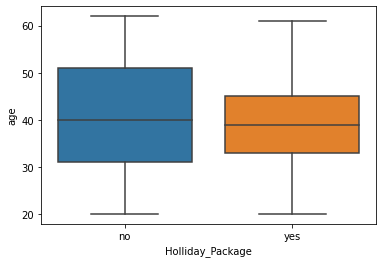

In [15]:
sns.boxplot(mydata['Holliday_Package'],mydata['age'])

### Education and Holiday Package

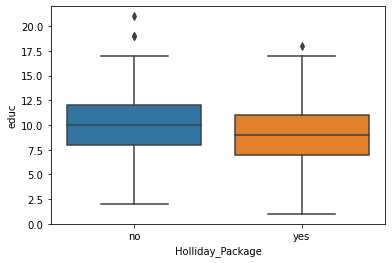

In [16]:
sns.boxplot(mydata['Holliday_Package'],mydata['educ'])

### Number of young children and Holiday Package

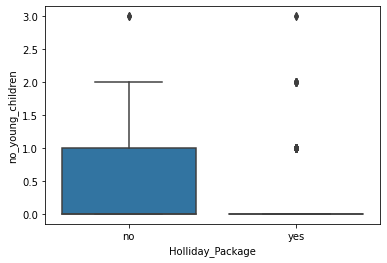

In [17]:
sns.boxplot(mydata['Holliday_Package'],mydata['no_young_children'])

### Number of older children and Holiday Package

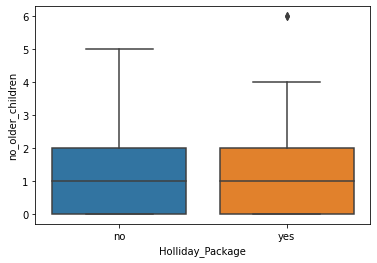

In [18]:
sns.boxplot(mydata['Holliday_Package'],mydata['no_older_children'])

### Foreign against Holiday Package

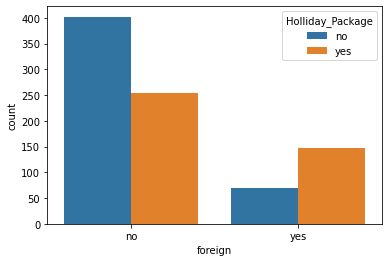

In [19]:
sns.countplot(mydata['foreign'],hue=mydata['Holliday_Package'])

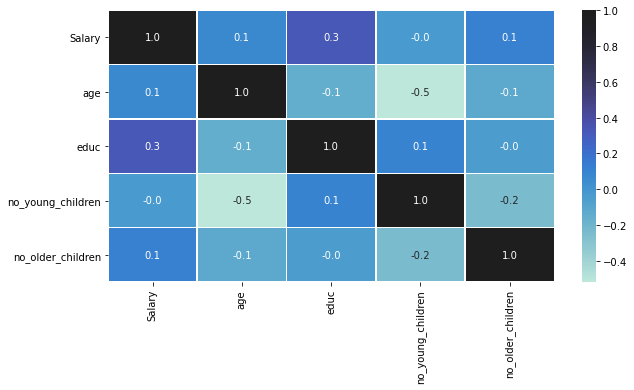

In [20]:
#Correlation among pairs of continuous variables
plt.figure(figsize=(10,5))
sns.heatmap(mydata.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

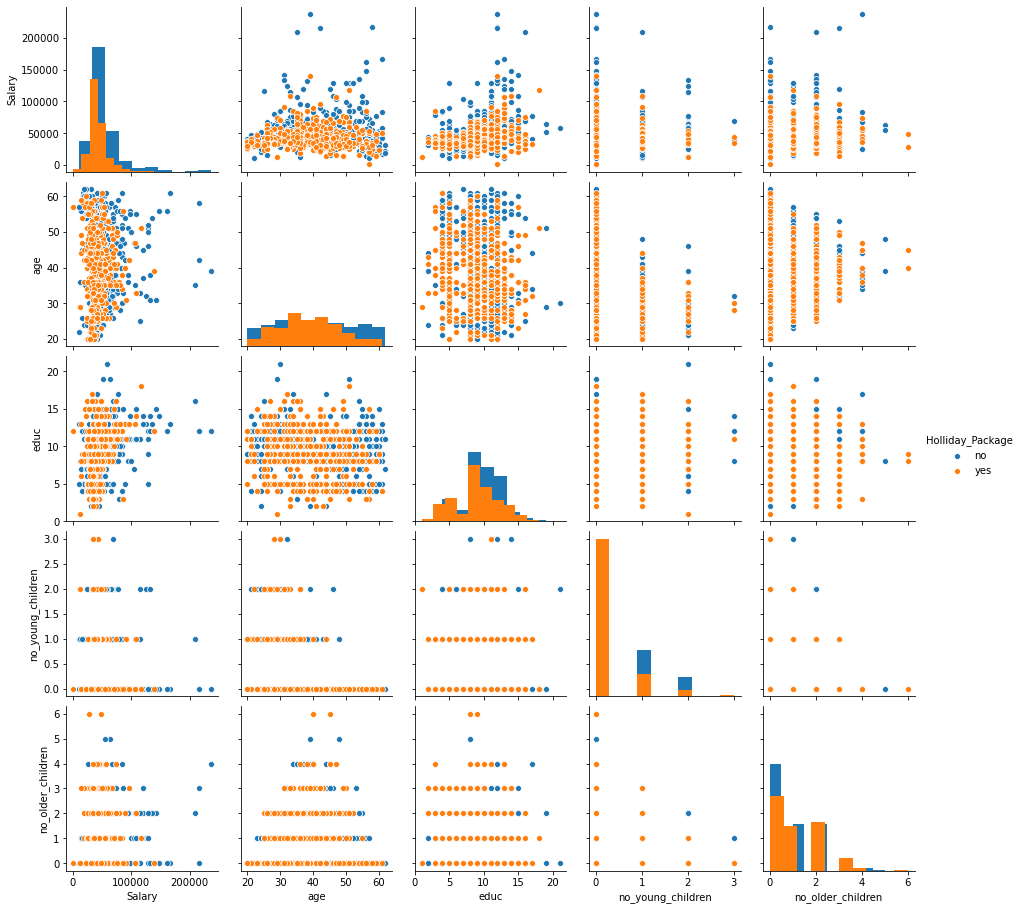

In [21]:
# Pairplot using sns
sns.pairplot(mydata ,diag_kind='hist' ,hue='Holliday_Package');

## Checking for duplicates

In [22]:
# Are there any duplicates ?
dups = mydata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


## Checking for Outliers

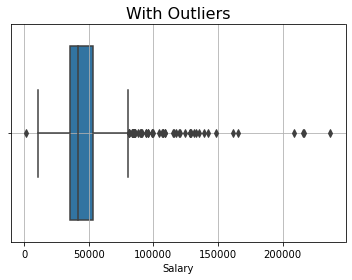

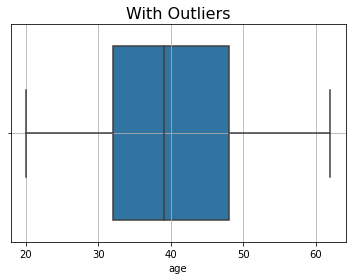

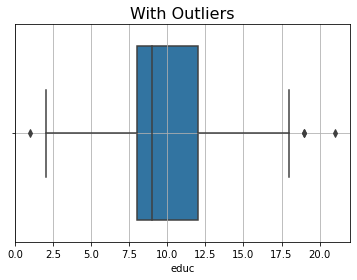

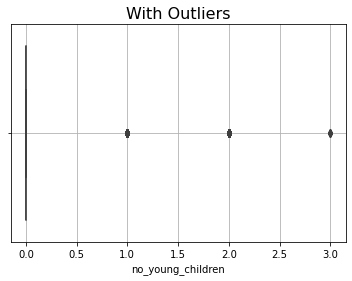

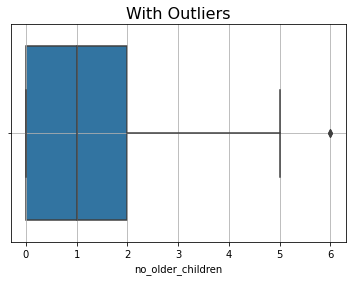

In [23]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(mydata[i],whis=1.5)
    plt.grid()
    plt.title('With Outliers',fontsize=16)
    plt.show();

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in mydata.columns:
    if mydata[column].dtype != 'object': 
        lr,ur=remove_outlier(mydata[column])
        mydata[column]=np.where(mydata[column]>ur,ur,mydata[column])
        mydata[column]=np.where(mydata[column]<lr,lr,mydata[column])

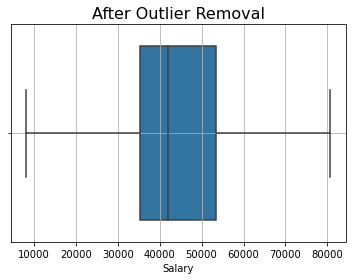

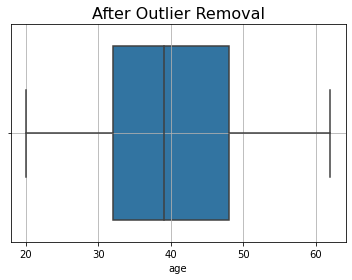

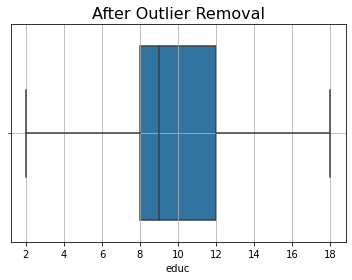

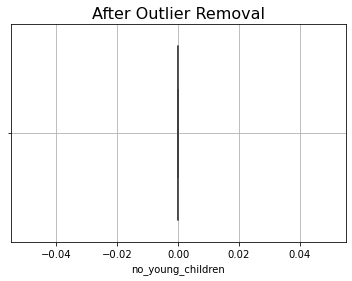

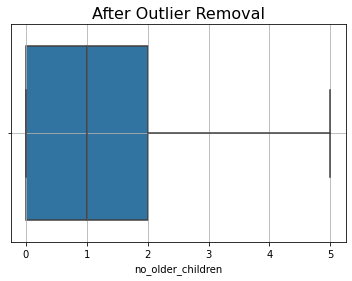

In [26]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(mydata[i],whis=1.5)
    plt.grid()
    plt.title('After Outlier Removal',fontsize=16)
    plt.show();

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## Converting categorical to dummy variables

In [27]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. 
mydata = pd.get_dummies(mydata, columns = ['foreign'], drop_first = True)
mydata.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,no,48412.0,30.0,8.0,0.0,1.0,0
1,yes,37207.0,45.0,8.0,0.0,1.0,0
2,no,58022.0,46.0,9.0,0.0,0.0,0
3,no,66503.0,31.0,11.0,0.0,0.0,0
4,no,66734.0,44.0,12.0,0.0,2.0,0


In [28]:
## Converting the 'Holliday Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [29]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

mydata['Holliday_Package'] = LE.fit_transform(mydata['Holliday_Package'])
mydata.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


## Train Test Split

In [30]:
# Copy all the predictor variables into X dataframe
X = mydata.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = mydata['Holliday_Package']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Check the % of 0s and 1s in Target Variable Class

In [32]:
print("Percentage of 0's",round(mydata.Holliday_Package.value_counts().values[0]/mydata.Holliday_Package.count()*100,2),'%')
print("Percentage of 1's",round(mydata.Holliday_Package.value_counts().values[1]/mydata.Holliday_Package.count()*100,2),'%')

Percentage of 0's 54.01 %
Percentage of 1's 45.99 %


## Logistic Regression Model

In [33]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [34]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [35]:
# Evaluation
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (610,)
ytest_predict (262,)


### Getting the Predicted Classes and Probs

In [36]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


## LDA Model

In [37]:
#Build LDA Model and fit the data
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train, train_labels)
model1

LinearDiscriminantAnalysis()

In [38]:
# Predict it
ytrain_predict1 = model1.predict(X_train)
ytest_predict1 = model1.predict(X_test)

In [39]:
# Evaluation
print('ytrain_predict1',ytrain_predict1.shape)
print('ytest_predict1',ytest_predict1.shape)

ytrain_predict1 (610,)
ytest_predict1 (262,)


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Logistic Regression

### Model Evaluation

In [40]:
# Accuracy - Training Data
model.score(X_train, train_labels)

0.6409836065573771

In [41]:
# Accuracy - Test Data
model.score(X_test, test_labels)

0.6297709923664122

### AUC and ROC for the training data

AUC: 0.667


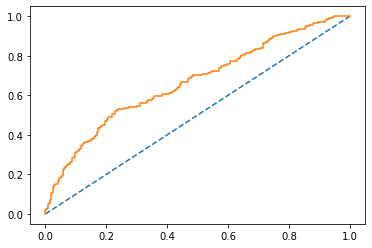

In [42]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.667


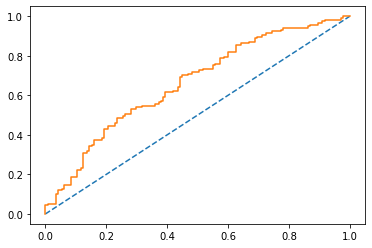

In [43]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [44]:
confusion_matrix(train_labels, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

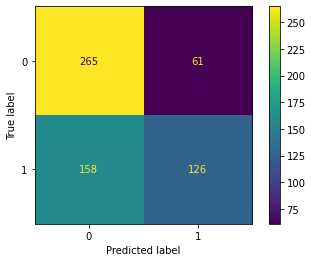

In [45]:
plot_confusion_matrix(model,X_train,train_labels);

In [46]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



### Confusion Matrix for test data

In [47]:
confusion_matrix(test_labels, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

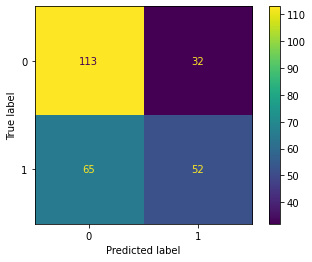

In [48]:
plot_confusion_matrix(model,X_test,test_labels);

In [49]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



## LDA

### Model Evaluation

In [50]:
#Train Data Accuracy
model1.score(X_train,train_labels)

0.6426229508196721

In [51]:
#Test Data Accuracy
model1.score(X_test,test_labels)

0.6297709923664122

### AUC and ROC for the training data

AUC: 0.667


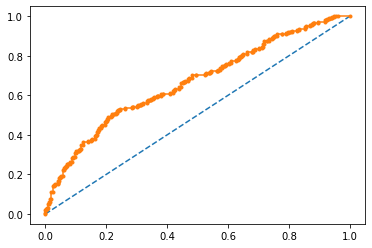

In [52]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.662


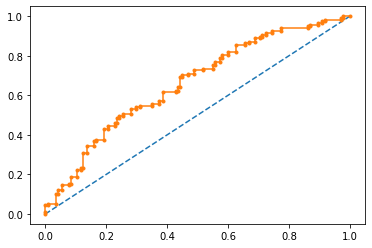

In [53]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Confusion Matrix for the training data

In [54]:
confusion_matrix(train_labels, ytrain_predict1)

array([[269,  57],
       [161, 123]], dtype=int64)

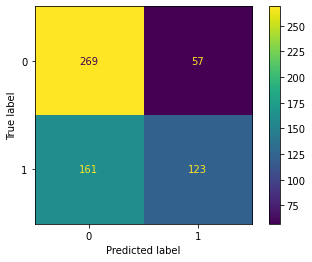

In [55]:
plot_confusion_matrix(model1,X_train,train_labels);

In [56]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



### Confusion Matrix for the test data

In [73]:
confusion_matrix(test_labels, ytest_predict1)

array([[113,  32],
       [ 65,  52]], dtype=int64)

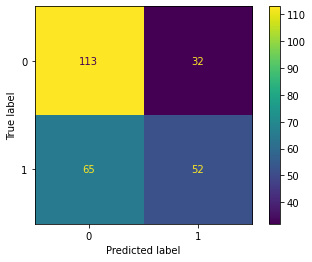

In [74]:
plot_confusion_matrix(model1,X_test,test_labels);

In [75]:
#Test Data Report
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262

